<a href="https://colab.research.google.com/github/AidHamza/solana-arbitrage-helpers/blob/main/solana_arbitrage_arb_assist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.0 MB/s eta 0:00:00



≈ KPI distribution (latest snapshot)

    index                  q25       q50         q75       q90        q95         q98        q995
--  --------------  ----------  --------  ----------  --------  ---------  ----------  ----------
 0  total_profit    408         4.63e+03    2.12e+04  7.49e+05   3.74e+06    3.65e+07    1.19e+08
 1  profit_per_arb    1.9e+04   3.23e+04    3.69e+05  1.39e+06   2.16e+06    3.67e+06    1.55e+07
 2  roi               0.0128    0.194       4.51      7.7       38.8       128         138
 3  arbs              0         0           0         4.3       10.2        17          17.8
 4  fails             0         6         168         1.79e+03   3.15e+03    1.02e+04    1.34e+04
 5  net_vol           9.51e+06  2e+08       3.05e+09  1.76e+10   2.36e+10    4.15e+10    8.68e+10
 6  tot_vol           1.03e+07  2.96e+08    3.82e+09  1.88e+10   3.27e+10    1.15e+11    1.66e+11
 7  liquidity         3.49e+11  2.05e+12    1.05e+13  2.8e+13    5.49e+13    3.19e+14    4.

,mint,total_profit,profit_per_arb,arbs,fails,roi
44614,83kGGSggYGP2ZEEyvX54SkZR1kFn84RgGCDyptbDbonk,147002755,19392085,7,14454,1.3182
44615,39zSVsSHFqNhARbVh6n8ZF78nCmhV3gSg8D39xhBNe73,34239553,1957949,17,10129,0.4615
44616,2XYgocKz9MvkNVVyj85kdM2VxsUwrJeQUZVD4qmD4dYT,5187755,411205,12,3829,0.1790
44617,CJBSwuppGWjBQfCueziH1czsyQp7DuW2wwYedC31bonk,1964538,742330,2,1771,0.1882
44618,71Jvq4Epe2FCJ7JFSF7jLXdNk1Wy4Bhqd9iL6bEFELvg,1009027,1069733,0,2313,0.0747
44619,3BtunCQ3KdpsYtXQU9SmkGopnDkaQHuEgG14Dy1Lbonk,719902,3350438,0,1358,0.0885
44620,J67qocUBjJNURyuTJBAFHftsk3Yo4ASDCphg2g42pump,596456,270873,2,496,0.2002
44621,Ce2gx9KGXJ6C9Mp5b5x1sn9Mg87JwEbrQby4Zqo3pump,398307,1356603,0,401,0.1251
44622,EPjFWdd5AufqSSqeM2qN1xzybapC8G4wEGGkZwyTDt1v,229419,55389,4,0,3.9796
44623,8r7Q1rEBNu4SoBfMYtDxpNSCKBQEv7NjESicu8wRpump,105964,5724,18,381,0.0302



High PROFIT but poor SUCCESS-RATE (<2 %)


,mint,total_profit,success_rate,arbs,fails
44614,83kGGSggYGP2ZEEyvX54SkZR1kFn84RgGCDyptbDbonk,147002755,0.000484,7,14454


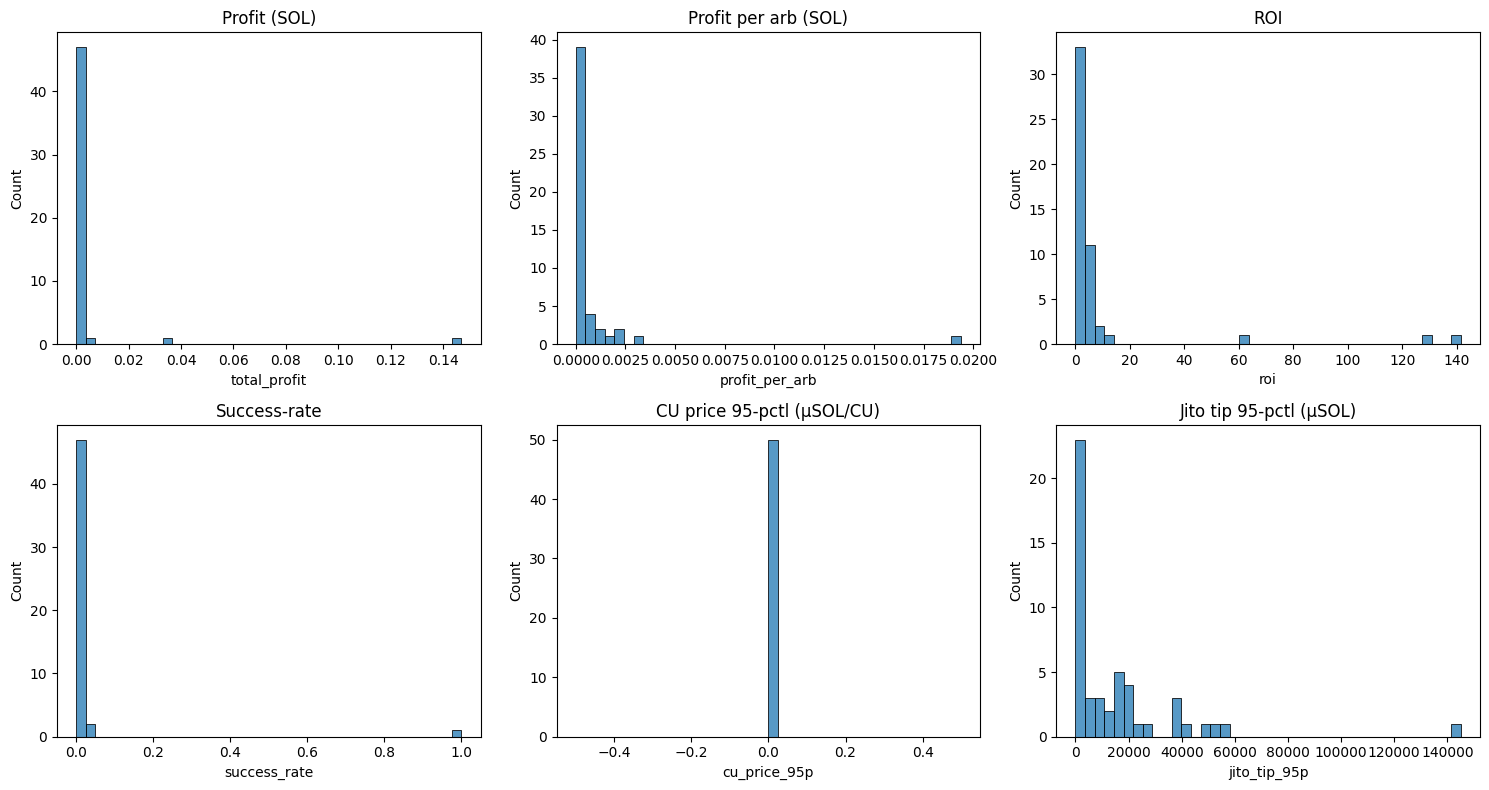

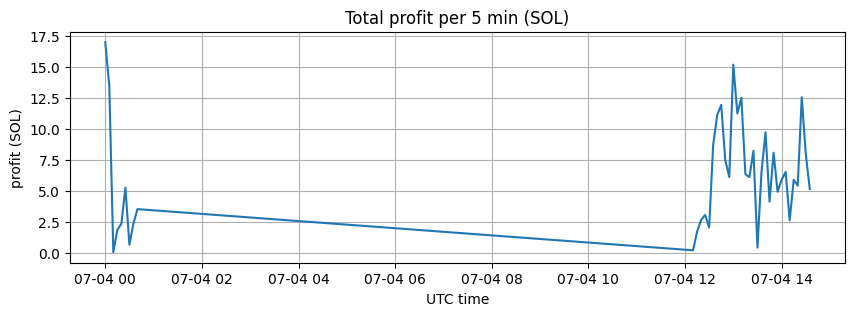


Building interactive ydata-profile (15 % sample)…


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 28/28 [00:00<00:00, 36.41it/s]


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x783d9de53d80> (for post_execute):


KeyboardInterrupt: 

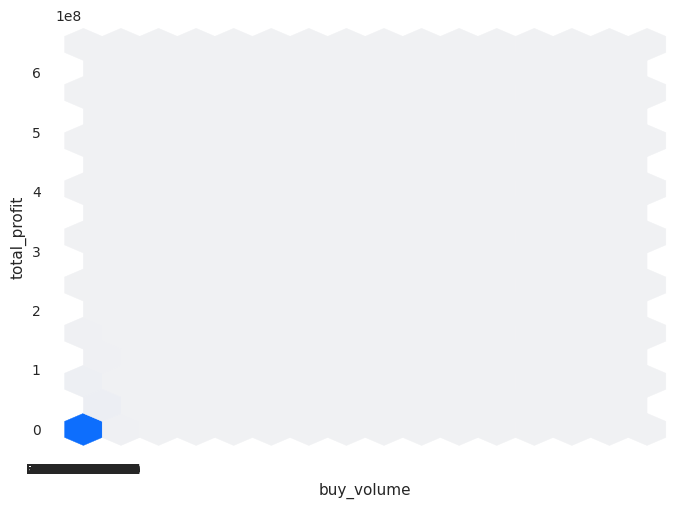

In [1]:
# ╔══════════════════════════════════════════════════════════════╗
# ║      ARB-ASSIST LOG ➜ SMB CONFIG • COMPLETE DASHBOARD       ║
# ║  Paste into ONE Colab / Jupyter cell and run.               ║
# ║  – uploads:  arb-assist-log.csv                             ║
# ║  – outputs:  filter_thresholds block, tables, plots, html   ║
# ╚══════════════════════════════════════════════════════════════╝
!pip -q install pandas numpy toml tabulate matplotlib seaborn ydata_profiling

import math
import textwrap
from pathlib import Path
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import toml
from tabulate import tabulate
from ydata_profiling import ProfileReport

# ───────────────────────── USER CONFIG ───────────────────────── #
# You can connect drive and use /content/drive/MyDrive/arb-assist/intermint_log_2025-07-04.csv
CSV_PATH = Path("/content/drive/MyDrive/arb-assist/intermint_log_2025-07-04.csv")   # ← change path to the updated daily logs
# ──────────────────────────────────────────────────────────────── #

# ─────────────────────── 1 ▸ CLEAN LOADER ────────────────────── #
NUMERIC_COLS = [
    "total_profit", "profit_per_arb", "roi", "arbs", "fails",
    "net_vol", "tot_vol", "liquidity", "turnover", "imbalance",
    "cu_price_25p", "cu_price_50p", "cu_price_75p", "cu_price_95p",
    "jito_tip_25p", "jito_tip_50p", "jito_tip_75p", "jito_tip_95p",
]

def str_to_num(series: pd.Series) -> pd.Series:
    """Remove underscores/commas and cast to float."""
    cleaned = series.str.replace(r"[_ ,]", "", regex=True)
    return pd.to_numeric(cleaned, errors="coerce")

raw = pd.read_csv(CSV_PATH, dtype=str)
for col in NUMERIC_COLS:
    if col in raw.columns:
        raw[col] = str_to_num(raw[col])

raw["timestamp"] = pd.to_datetime(raw["timestamp"], errors="coerce")
snap = raw.loc[raw.timestamp == raw.timestamp.max()].copy()
snap["success_rate"] = snap["arbs"] / (snap["arbs"] + snap["fails"] + 1e-9)

# ───────────────────── 2 ▸ QUANTILE TABLE ───────────────────── #
Q = snap[NUMERIC_COLS].quantile(
    [0.25, 0.50, 0.75, 0.90, 0.95, 0.98, 0.995]
).T
Q.columns = ["q25", "q50", "q75", "q90", "q95", "q98", "q995"]

print("\n≈ KPI distribution (latest snapshot)\n")
print(tabulate(Q.reset_index(), headers="keys", floatfmt=".3g"))

# ───── 3 ▸ AUTO-BUILD FILTER TIERS (with clamps & rounding) ──── #
TIERS = [
    dict(tag="Scout", q=0.50),
    dict(tag="Warm",  q=0.75),
    dict(tag="Hot",   q=0.90),
    dict(tag="Nuke",  q=0.98),
]

FLOOR_PROFIT          = 5_000_000      # 0.005 SOL
FLOOR_PROFIT_PER_ARB  = 500_000        # 0.0005 SOL
FLOOR_ROI, MAX_ROI    = 0.05, 1.5
FLOOR_TXNS            = 1

def clamp(val, lo=None, hi=None):
    if lo is not None and val < lo:
        return lo
    if hi is not None and val > hi:
        return hi
    return val

rlamports = lambda x: int(round(x / 10_000)) * 10_000
q = lambda m, qstr: 0 if m not in Q.index else Q.loc[m, qstr]

filter_levels = []
for tier in TIERS:
    qstr = f"q{int(tier['q']*100)}"
    level = dict(
        min_profit           = rlamports(clamp(q("total_profit",      qstr)*0.8,
                                               lo=FLOOR_PROFIT)),
        min_profit_per_arb   = rlamports(clamp(q("profit_per_arb",    qstr)*0.8,
                                               lo=FLOOR_PROFIT_PER_ARB)),
        min_roi              = clamp(round(q("roi", qstr)*0.6, 2),
                                               lo=FLOOR_ROI, hi=MAX_ROI),
        min_txns             = clamp(int(q("arbs", qstr)), lo=FLOOR_TXNS),
        min_fails            = 0,
        min_net_volume       = rlamports(q("net_vol",  qstr)),
        min_total_volume     = rlamports(q("tot_vol",  qstr)),
        min_imbalance_ratio  = 0.0,
        max_imbalance_ratio  = 1.0,
        min_liquidity        = 0,
        min_turnover         = 0.0,
        min_volatility       = 0.0,
    )
    filter_levels.append(level)

print("\n##########   paste into arb-assist.toml   ##########\n")
print(textwrap.indent(toml.dumps({"filter_thresholds": filter_levels}), "  "))

# ──────────────── 4 ▸ TOP-N & BAD SUCCESS TABLES ─────────────── #
print("\nTop-10 mints by TOTAL PROFIT")
display(snap.sort_values("total_profit", ascending=False)
        [["mint","total_profit","profit_per_arb","arbs","fails","roi"]].head(10))

print("\nHigh PROFIT but poor SUCCESS-RATE (<2 %)")
bad = snap.query("total_profit > 1e8 and success_rate < .02")
display(bad[["mint","total_profit","success_rate","arbs","fails"]])

# ───────────────────── 5 ▸ DISTRIBUTION PLOTS ────────────────── #
plt.style.use("default")
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.ravel()

sns.histplot(snap["total_profit"]/1e9, bins=40, ax=axs[0])
axs[0].set_title("Profit (SOL)")

sns.histplot(snap["profit_per_arb"]/1e9, bins=40, ax=axs[1])
axs[1].set_title("Profit per arb (SOL)")

sns.histplot(snap["roi"], bins=40, ax=axs[2])
axs[2].set_title("ROI")

sns.histplot(snap["success_rate"], bins=40, ax=axs[3])
axs[3].set_title("Success-rate")

sns.histplot(snap["cu_price_95p"], bins=40, ax=axs[4])
axs[4].set_title("CU price 95-pctl (µSOL/CU)")

sns.histplot(snap["jito_tip_95p"], bins=40, ax=axs[5])
axs[5].set_title("Jito tip 95-pctl (µSOL)")

plt.tight_layout()
plt.show()

# ─────────────── 6 ▸ TIME-SERIES PROFIT (5-min) ──────────────── #
raw["bucket"] = raw["timestamp"].dt.floor("5min")
ts = (raw.groupby("bucket")["total_profit"]
          .sum()
          .div(1e9)          # → SOL
          .rename("profit_SOL")
          .reset_index())

plt.figure(figsize=(10, 3))
plt.plot(ts["bucket"], ts["profit_SOL"])
plt.title("Total profit per 5 min (SOL)")
plt.grid(True); plt.xlabel("UTC time"); plt.ylabel("profit (SOL)")
plt.show()

# ───────────── 7 ▸ OPTIONAL INTERACTIVE PROFILE HTML ─────────── #
print("\nBuilding interactive ydata-profile (15 % sample)…")
ProfileReport(raw.sample(frac=0.15, random_state=1),
              title="Arb-assist profile").to_file("profile.html")
print("✓ profile.html saved – download if needed.")

# ───────────── 8 ▸ MARKDOWN SUMMARY FOR SLACK / NOTION ───────── #
summary_md = f"""
### Arb-assist snapshot – {datetime.utcnow():%Y-%m-%d %H:%M} UTC

| KPI | p50 | p75 | p90 | p95 |
| --- | --- | --- | --- | --- |
| **Profit (L)** | {int(Q.loc['total_profit','q50']):,} | {int(Q.loc['total_profit','q75']):,} | {int(Q.loc['total_profit','q90']):,} | {int(Q.loc['total_profit','q95']):,} |
| **ROI** | {Q.loc['roi','q50']:.2f} | {Q.loc['roi','q75']:.2f} | {Q.loc['roi','q90']:.2f} | {Q.loc['roi','q95']:.2f} |
| **Success-rate** | {snap['success_rate'].median()*100:.1f}% | – | – | – |

Top-5 mints by profit:
"""
print("\n" + summary_md)